### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [93]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import sklearn

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [94]:
# Load the CSV file(s) as reviews.
# Import the data set.
df_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(df_reviews.shape)
print(df_reviews.dtypes)
print(df_reviews.columns)
df_reviews.head()
df_reviews.info()

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 

In [95]:
# Any missing values?
df_reviews['loyalty_points'].isnull().sum()

0

In [96]:
# Any missing values?
df_reviews['product'].isnull().sum()

0

In [97]:
# Explore the data.
df_reviews.count()

gender                    2000
age                       2000
remuneration (k£)         2000
spending_score (1-100)    2000
loyalty_points            2000
education                 2000
language                  2000
platform                  2000
product                   2000
review                    2000
summary                   2000
dtype: int64

In [98]:
print(df_reviews.shape)
print(df_reviews.dtypes)

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [99]:
df_reviews.value_counts()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  education     language  platform  product  review                                                                                                                                                                               summary          
Female  17   13.94              40                      233             postgraduate  EN        Web       7573     My son (8) and daughter (11) were and still are intrigued by this toy                                                                                                                Five Stars           1
Male    29   22.96              82                      1150            postgraduate  EN        Web       2261     Fun game. A little complicated, but fun once you understand how it works.                                                                                                            Five Stars           1
             71.34              13              

In [100]:
# Descriptive statistics.
df_reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [101]:
# Descriptive statistics.
df_reviews.sum()

gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
age                                                                   78990
remuneration (k£)                                                  96158.12
spending_score (1-100)                                               100000
loyalty_points                                                      3156064
education                 graduategraduategraduategraduategraduatePhDdip...
language                  ENENENENENENENENENENENENENENENENENENENENENENEN...
platform                  WebWebWebWebWebWebWebWebWebWebWebWebWebWebWebW...
product                                                             8641043
review                    When it comes to a DM's screen, the space on t...
summary                   The fact that 50% of this space is wasted on a...
dtype: object

## 2. Drop columns

In [102]:
# Drop unnecessary columns.
df_new = df_reviews.drop(['language', 'platform'], axis='columns')

# View column names.
df_new.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [103]:
# Rename the column headers.
df_new.rename({'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending_score'}, axis=1, inplace=True)

# View column names.
print(df_new.shape)
print(df_new.dtypes)
print(df_new.columns)
df_new.head()
df_new.info()

(2000, 9)
gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null 

## 4. Save the DataFrame as a CSV file

In [104]:
# Create a CSV file as output.
df_new.to_csv('turtle_reviews_updated.csv')

In [105]:
# Import new CSV file with Pandas.
df_updated = pd.read_csv('turtle_reviews_updated.csv')

# View DataFrame.
print(df_updated.shape)
print(df_updated.dtypes)
print(df_updated.columns)
df_updated.head()
df_updated.info()

(2000, 10)
Unnamed: 0          int64
gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
Index(['Unnamed: 0', 'gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   i

## 5. Linear regression

### 5a) spending vs loyalty

In [106]:
#1 Independent variable.
y = df_updated['loyalty_points']  

# Dependent variable.
x = df_updated[['spending_score']] 

# OLS model and summary.
mlr = linear_model.LinearRegression()
mlr.fit(x, y) 

LinearRegression()

In [107]:
#2 Call the predictions for X (array).
mlr.predict(x) 

array([1214.35337415, 2602.94449102,  123.31749662, ..., 2933.56142361,
        453.93442921,  189.44088314])

In [108]:
#3 Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df_updated).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        01:31:26   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#4 Print the R-squared value.
print("R-squared: ", mlr.score(x,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(x, mlr.coef_))  

R-squared:  0.4520008865838909
Intercept:  -75.05266293364775
Coefficients:


[('spending_score', 33.06169325867295)]

In [110]:
#5 Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print ("Predicted Value: \n", test.predict())  


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted Value: 
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [111]:
#6 Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [112]:
#7 Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1256.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          1.65e-203
Time:                        01:31:29   Log-Likelihood:                -13205.
No. Observations:                1600   AIC:                         2.641e+04
Df Residuals:                    1598   BIC:                         2.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -38.3952     50.648     -0.

In [113]:
#8 Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [114]:
#9 Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * df_updated['spending_score'] 

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

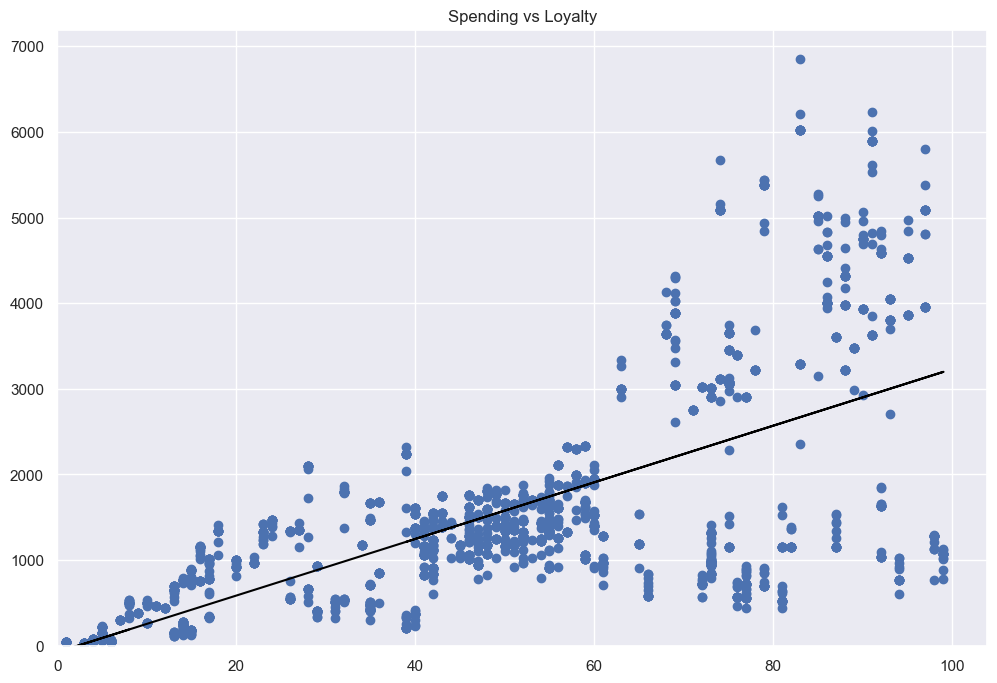

In [115]:
#10 Plot the graph with a regression line.
plt.scatter(x, y)
plt.title('Spending vs Loyalty')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)


# View the plot.
plt.show()


### 5b) renumeration vs loyalty

In [24]:
#1 Independent variable.
y = df_updated['loyalty_points']  

# Dependent variable.
x = df_updated[['renumeration']] 

# OLS model and summary.
mlr = linear_model.LinearRegression()
mlr.fit(x, y) 


LinearRegression()

In [25]:
#2 Call the predictions for X (array).
mlr.predict(x) 

array([ 354.82374068,  354.82374068,  382.85775758, ..., 3102.15739671,
       3298.39551499, 3102.15739671])

In [26]:
#3 Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df_updated).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        01:30:19   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#4 Print the R-squared value.
print("R-squared: ", mlr.score(x,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(x, mlr.coef_))  

R-squared:  0.3795357732793634
Intercept:  -65.68651279500432
Coefficients:


[('renumeration', 34.1878254856689)]

In [28]:
#5 Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print ("Predicted Value: \n", test.predict())  


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted Value: 
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [29]:
#6 Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [30]:
#7 Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     874.6
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          1.12e-153
Time:                        01:30:20   Log-Likelihood:                -13320.
No. Observations:                1600   AIC:                         2.664e+04
Df Residuals:                    1598   BIC:                         2.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8268     58.136      0.066   

In [31]:
#8 Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [32]:
#9 Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * df_updated['renumeration'] 

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

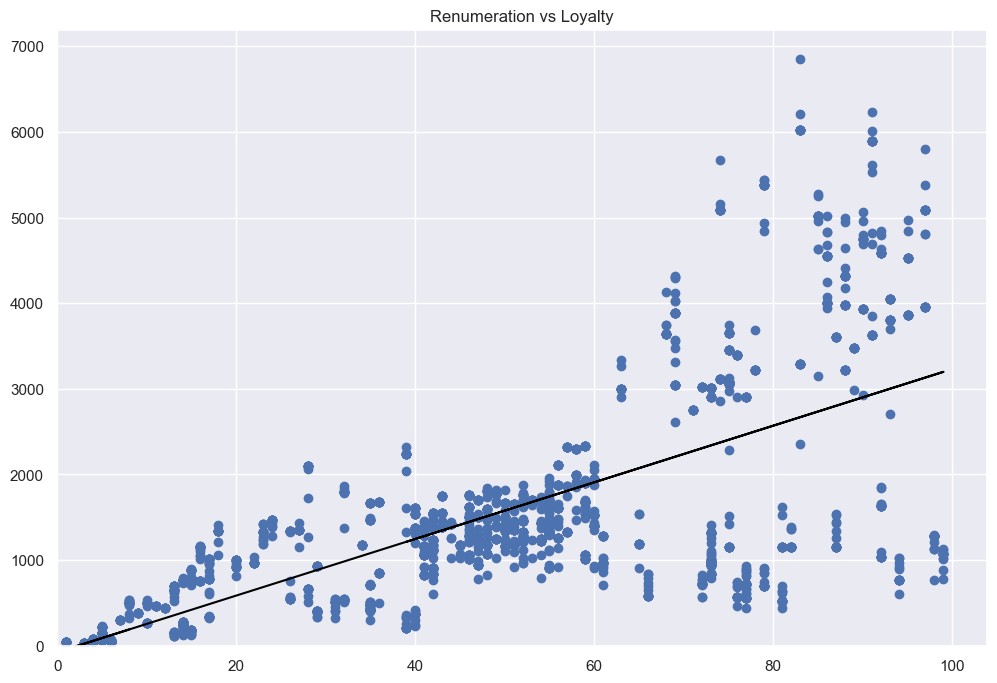

In [116]:
#10 Plot the graph with a regression line.
plt.scatter(x, y)
plt.title('Renumeration vs Loyalty')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()


### 5c) age vs loyalty

In [118]:
#1 Independent variable.
y = df_updated['loyalty_points']  

# Dependent variable.
x = df_updated[['age']] 

# OLS model and summary.
mlr = linear_model.LinearRegression()
mlr.fit(x, y) 

LinearRegression()

In [119]:
#2 Call the predictions for X (array).
mlr.predict(x) 

array([1664.2872467 , 1644.22322095, 1648.2360261 , ..., 1600.0823643 ,
       1600.0823643 , 1608.1079746 ])

In [120]:
#3 Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df_updated).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0577
Time:                        01:34:33   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#4 Print the R-squared value.
print("R-squared: ", mlr.score(x,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(x, mlr.coef_))  

R-squared:  0.0018015480437203468
Intercept:  1736.517739399063
Coefficients:


[('age', -4.012805149995266)]

In [122]:
#5 Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print ("Predicted Value: \n", test.predict())  


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted Value: 
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [123]:
#6 Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [124]:
#7 Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.833
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0925
Time:                        01:34:36   Log-Likelihood:                -13667.
No. Observations:                1600   AIC:                         2.734e+04
Df Residuals:                    1598   BIC:                         2.735e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1707.4215     94.872     17.997      0.0

In [125]:
#8 Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [126]:
#9 Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * df_updated['age'] 
             
# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

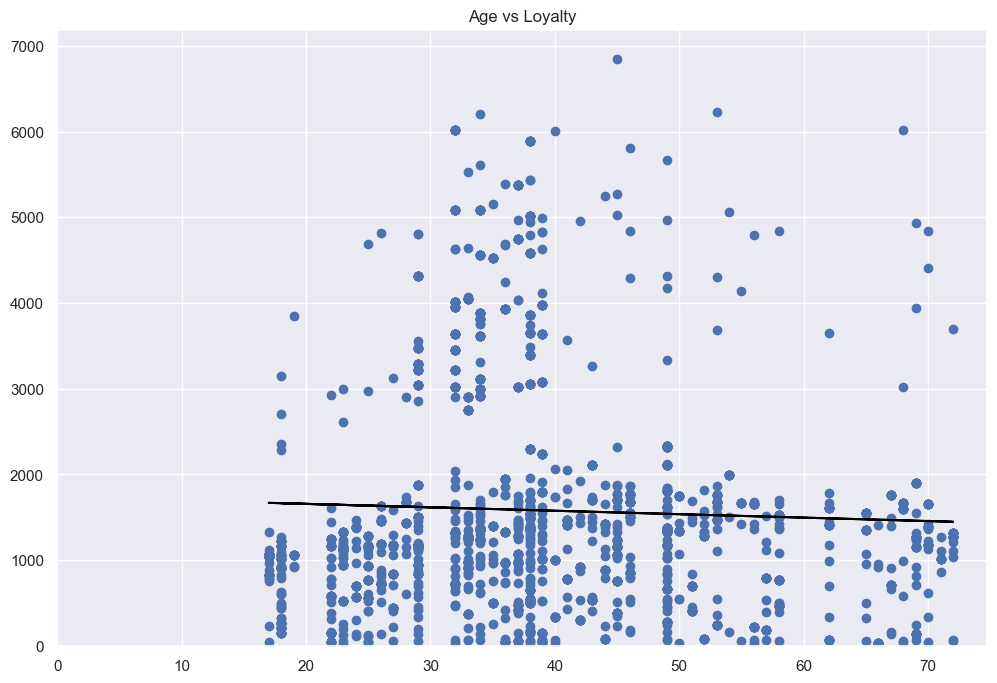

In [127]:
#10 Plot the graph with a regression line.
plt.scatter(x, y)
plt.title('Age vs Loyalty')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()


## 6. Observations and insights

***Your observations here...***






Based on the analysis, the observations on the loyaty program are as follow:

Once data was loaded, it was examined, cleaned, and transformed - data wrangled, it was clear that some columns were irrelevant to the analysis and therefore deleted. I've checked that there's no missing data in the Loyalty Points and Product column. 

As a business analysis for Turtle Games, it's essential to identify how customers accumulate loyalty points.

The linear regression plots tell us that:
Spending and loyalty are positively correlated
Remuneration and loyalty are also positively correlated
But age and loyalty are negatively correlated.
This means people with higher incomes and who spend more on games are more loyal to Turtle games. In comparison, loyalty diminishes as they grow older.


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [44]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_updated.csv')

# View DataFrame.
print(df2.shape)
print(df2.dtypes)
print(df2.columns)
df2.head()
df2.info()

(2000, 10)
Unnamed: 0          int64
gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
Index(['Unnamed: 0', 'gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   i

In [46]:
# Drop unnecessary columns.
df2_new = df2.drop(['Unnamed: 0','gender','age','loyalty_points','education','product', 'review', 'summary'], axis='columns')

# View column names.
df2_new.head()


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [47]:
# Explore the data.
df2_new.count()

renumeration      2000
spending_score    2000
dtype: int64

In [48]:
print(df2_new.shape)
print(df2_new.dtypes)

(2000, 2)
renumeration      float64
spending_score      int64
dtype: object


In [49]:
df2_new.value_counts()

renumeration  spending_score
39.36         59                21
32.80         42                20
92.66         8                 16
63.96         1                 16
84.46         69                15
                                ..
60.68         72                 7
56.58         91                 7
              58                 7
54.94         57                 7
57.40         29                 7
Length: 196, dtype: int64

In [50]:
# Descriptive statistics.
df2_new.describe()

,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

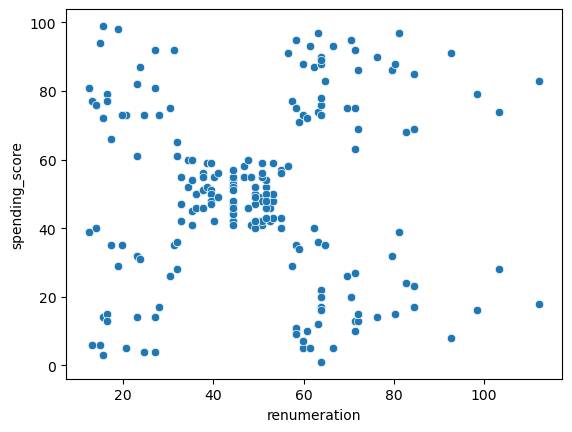

In [51]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration', y='spending_score',
               marker='o', legend='full',
               data=df2_new)

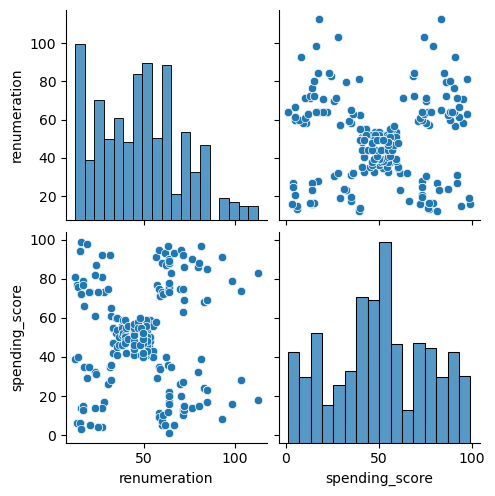

In [52]:
# Create a pairplot with Seaborn.
sns.pairplot(df2_new)

## 3. Elbow and silhoutte methods

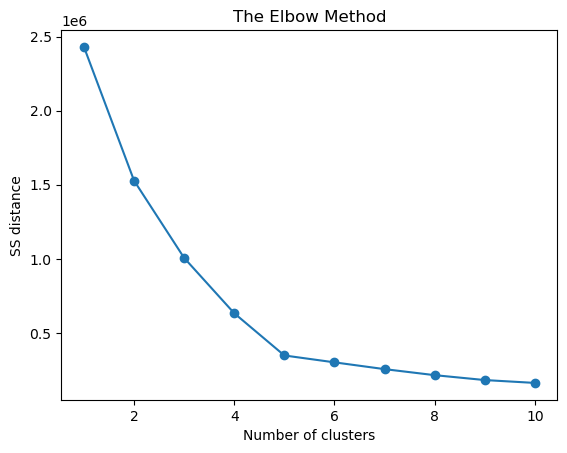

In [53]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2_new)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

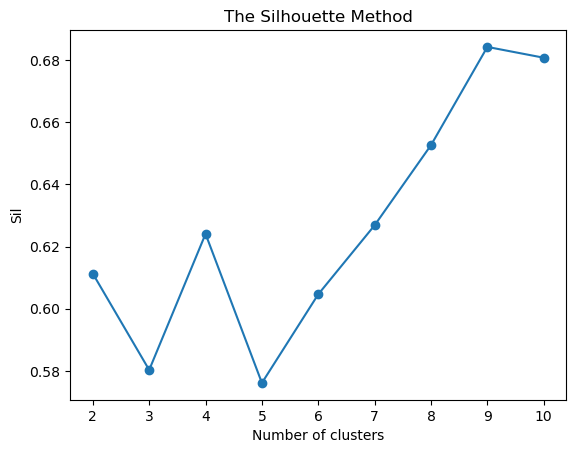

In [54]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

0    1340
1     660
Name: K-Means Predicted, dtype: int64

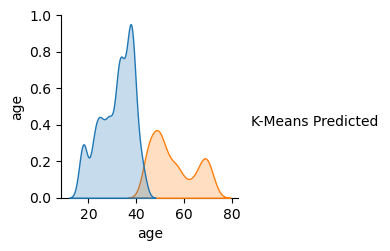

In [55]:
# Use two clusters.
kmeans = KMeans(n_clusters = 2, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    970
0    520
1    510
Name: K-Means Predicted, dtype: int64

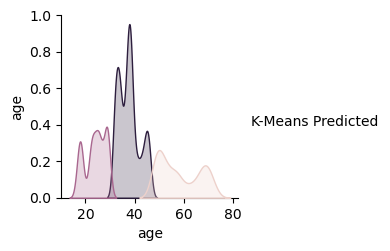

In [56]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    830
0    510
1    460
3    200
Name: K-Means Predicted, dtype: int64

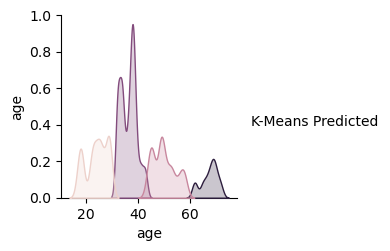

In [57]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

## 5. Fit final model and justify your choice

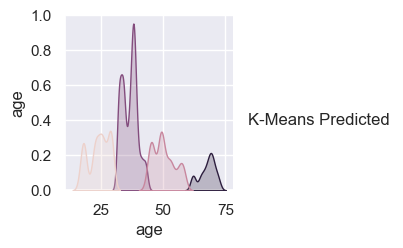

In [128]:
# Apply the final model.
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')


In [129]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    830
0    510
1    460
3    200
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [60]:
# Visualising the clusters.
# View the DataFrame.
print(x.head())

   age  K-Means Predicted
0   18                  0
1   23                  0
2   22                  0
3   25                  0
4   33                  2


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

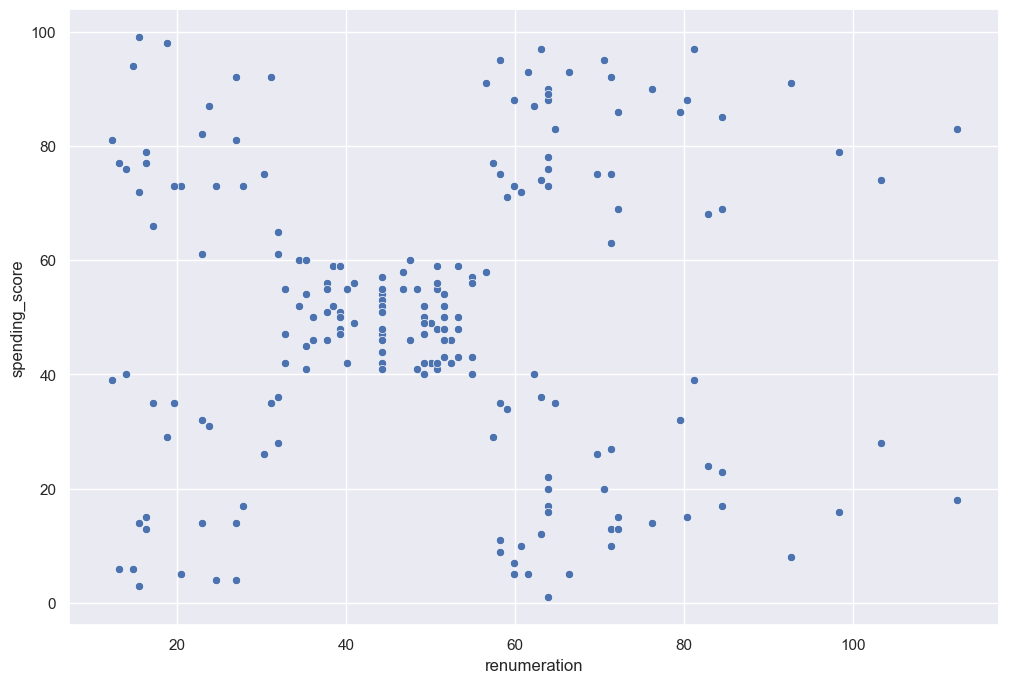

In [61]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration', y='spending_score',
                data=df2_new)
                

## 7. Discuss: Insights and observations

***Your observations here...***

Based on the analysis, the observations on the loyaty program are as follow:

k=4 (four clusters) gives the best results (groups). The remuneration is closely correlated to the spending; therefore, Cluster 1 for both k=3 and k=4 is the largest group. The number of predicted values per class indicates a better distribution for k=4 than k=3. Through the clusters for k-means clustering it’s noted that most popular age of customer is between 30- to 40-year-old.


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [62]:
!pip install WordCloud
!pip install nltk

# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jencheng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jencheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_updated.csv')

# View DataFrame.
print(df3.shape)
print(df3.dtypes)
print(df3.columns)
df3.head()
df3.info()

(2000, 10)
Unnamed: 0          int64
gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
Index(['Unnamed: 0', 'gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   i

In [64]:
# Explore data set.
df3.describe()

,Unnamed: 0,age,renumeration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,577.494589,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,0.000000,17.000000,12.300000,1.000000,25.000000,107.000000
25%,499.750000,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,999.500000,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,1499.250000,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,1999.000000,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [65]:
# Keep necessary columns. Drop unnecessary columns.
df3_new = df3.drop(['Unnamed: 0','gender','age','renumeration','spending_score','loyalty_points','education','product'], axis='columns')

# View DataFrame.
print(df3_new.shape)
print(df3_new.dtypes)
print(df3_new.columns)
df3_new.head()
df3_new.info()

(2000, 2)
review     object
summary    object
dtype: object
Index(['review', 'summary'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [66]:
# Determine if there are any missing values.
df3_new['review'].isna().sum()

0

In [67]:
# Determine if there are any missing values.
df3_new['summary'].isna().sum()

0

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [68]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df3_new['review'] = df3_new['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_new['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [69]:
# Summary: Change all to lower case and join with a space.
# Transform data to lowercase.
df3_new['summary'] = df3_new['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_new['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [70]:
# Replace all the punctuations in review column.
df3_new['review'] = df3_new['review'].str.replace('[^\w\s]','')

# View output.
df3_new['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [71]:
# Replace all the puncuations in summary column.
df3_new['summary'] = df3_new['summary'].str.replace('[^\w\s]','')

# View output.
df3_new['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [72]:
# Drop duplicates in both columns.
df3_new.review.duplicated().sum()

# View DataFrame.
df3_new['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [73]:
# Drop duplicates in both columns.
df3_new.summary.duplicated().sum()

# View DataFrame.
df3_new['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

## 3. Tokenise and create wordclouds

In [74]:
# Create new DataFrame (copy DataFrame).
df_wc = df3_new

# View DataFrame.
print(df_wc.shape)
print(df_wc.dtypes)
print(df_wc.columns)
df_wc.head()
df_wc.info()

(2000, 2)
review     object
summary    object
dtype: object
Index(['review', 'summary'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [75]:
# Apply tokenisation to both columns.
df_wc['token_review'] = df_wc['review'].apply(word_tokenize)

# Preview data.
df_wc['token_review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: token_review, dtype: object

In [76]:
# Apply tokenisation to both columns.
df_wc['token_summary'] = df_wc['summary'].apply(word_tokenize)

# Preview data.
df_wc['token_summary'].head()
df_wc.head()

,review,summary,token_review,token_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


### Review: Create a word cloud.


In [77]:
# Review: Plot the WordCloud image.
all_text = ''
for i in range(df_wc.shape[0]):
    # Add each comment.
    all_text = all_text + df_wc['review'][i]
    
for i in range(df_wc.shape[0]):
    # Add each comment.
    all_text = all_text + df_wc['summary'][i]


In [78]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_text) 

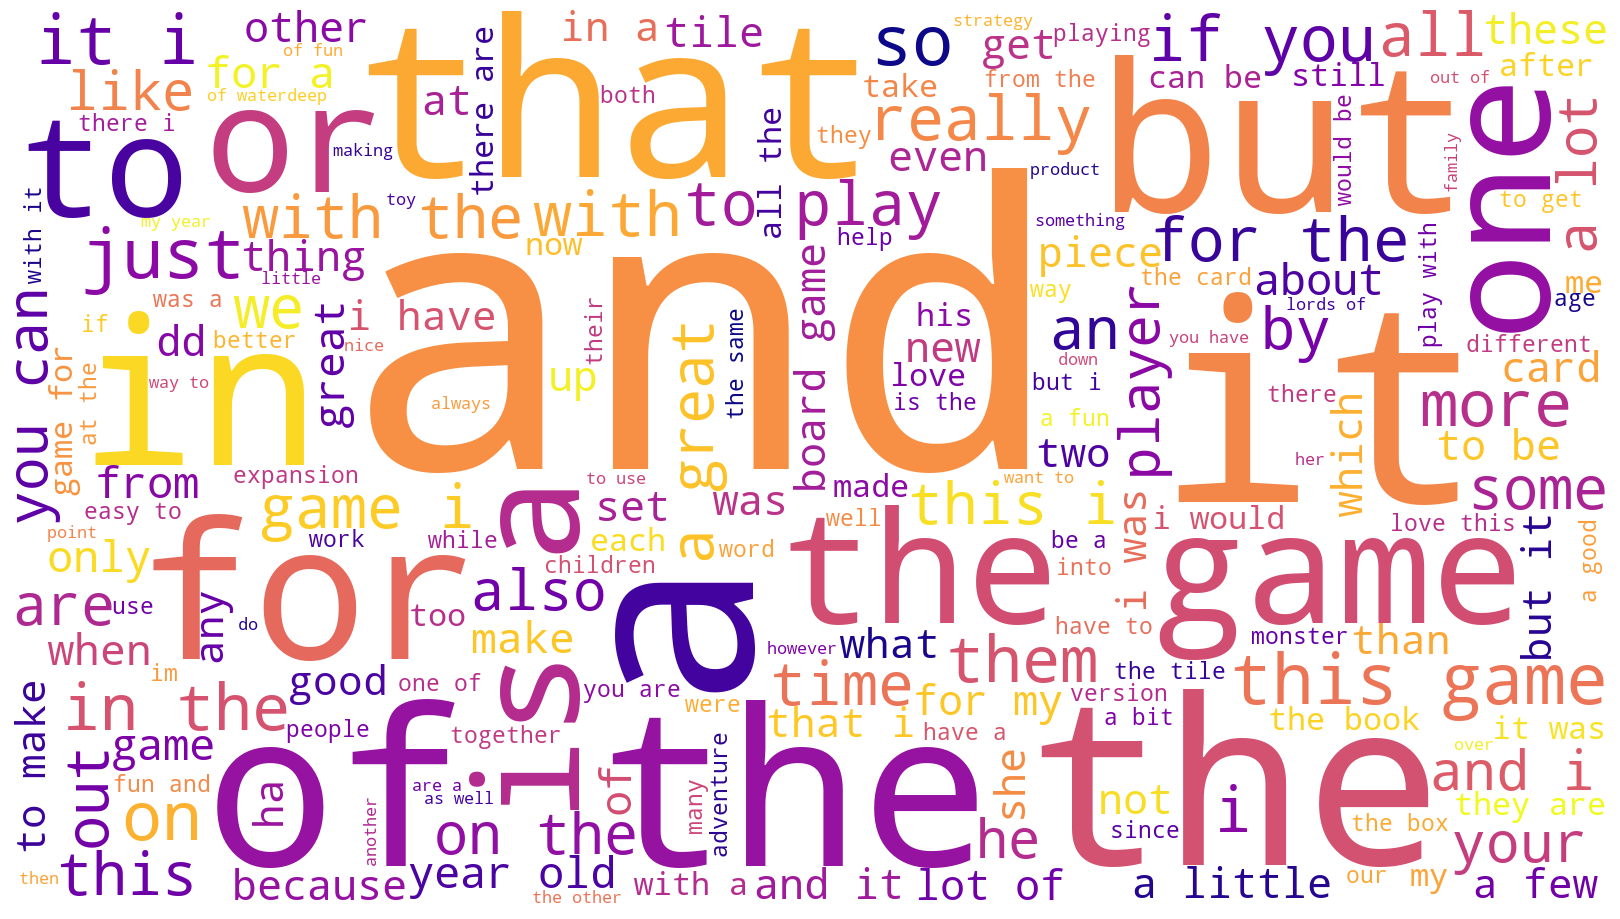

In [79]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [80]:
# Determine the frequency distribution.
# Define an empty list of tokens.
all_tokens = []

for i in range(df_wc.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df_wc['token_review'][i]
    
for i in range(df_wc.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df_wc['token_summary'][i]

In [81]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5713, 'and': 3402, 'a': 3401, 'to': 3356, 'of': 2627, 'it': 2240, 'i': 2177, 'game': 2004, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [82]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [83]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [84]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string)                    


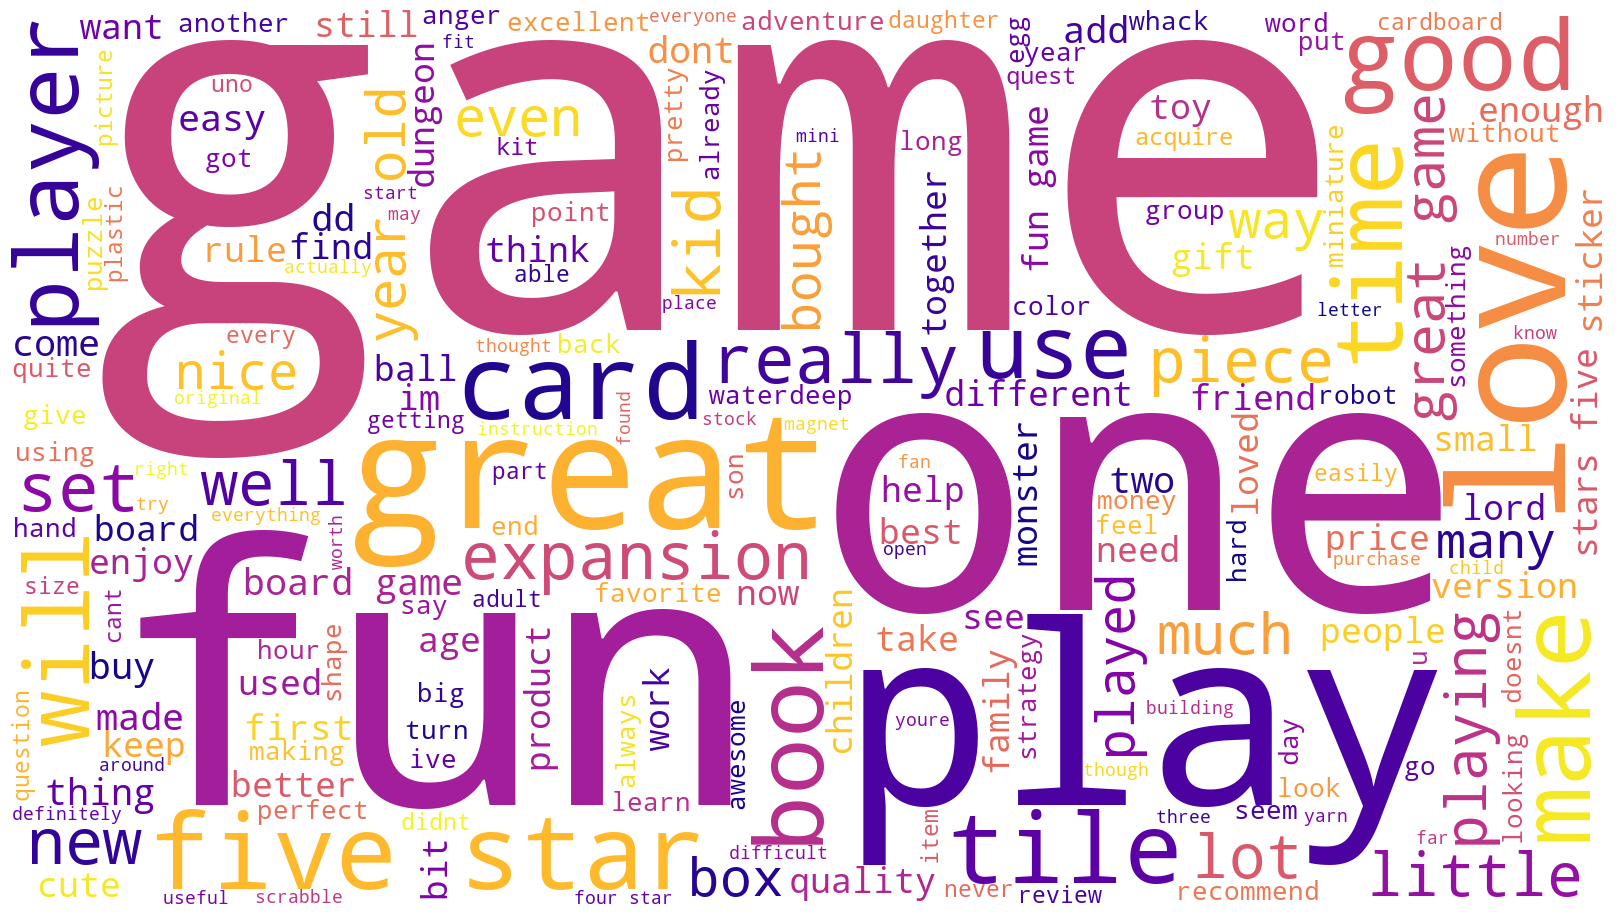

In [85]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [86]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 2004, 'great': 891, 'fun': 771, 'one': 568, 'play': 528, 'stars': 503, 'like': 468, 'love': 424, 'five': 401, 'good': 386, ...})

In [87]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,2004
great,891
fun,771
one,568
play,528
stars,503
like,468
love,424
five,401


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [159]:
!pip install textblob

from textblob import TextBlob

# Create new dataframe
df_sen = df_wc.drop(['token_review', 'token_summary', 'polarity'], axis='columns')

# Check popularity and sentiment
def generate_polarity(df_sen):
    return TextBlob(df_sen).sentiment[0]

# Populate a new column with polarity scores for each review.
df_sen['review_polarity'] = df_sen['review'].apply(generate_polarity)

# Preview the result.
df_sen['review_polarity'].head()

# Populate a new column with polarity scores for each summary.
df_sen['summary_polarity'] = df_sen['summary'].apply(generate_polarity)

# Preview the result.
df_sen['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

In [160]:
# Determine polarity of review. 
all_review = ''
for i in range(df_sen.shape[0]):
    # Add each comment.
    all_review = all_review + df_sen['review'][i]

blob_review = TextBlob(all_review)

# View output.
for sentence in blob_review.sentences:
    print(sentence.sentiment.polarity)

0.12422350451666696


In [162]:
# Determine polarity of summary. 
all_summary = ''
for i in range(df_wc.shape[0]):
    # Add each comment.
    all_summary = all_summary + df_sen['summary'][i]

blob_summary = TextBlob(all_summary)

# View output.
for sentence in blob_summary.sentences:
    print(sentence.sentiment.polarity)

0.21403842905686177


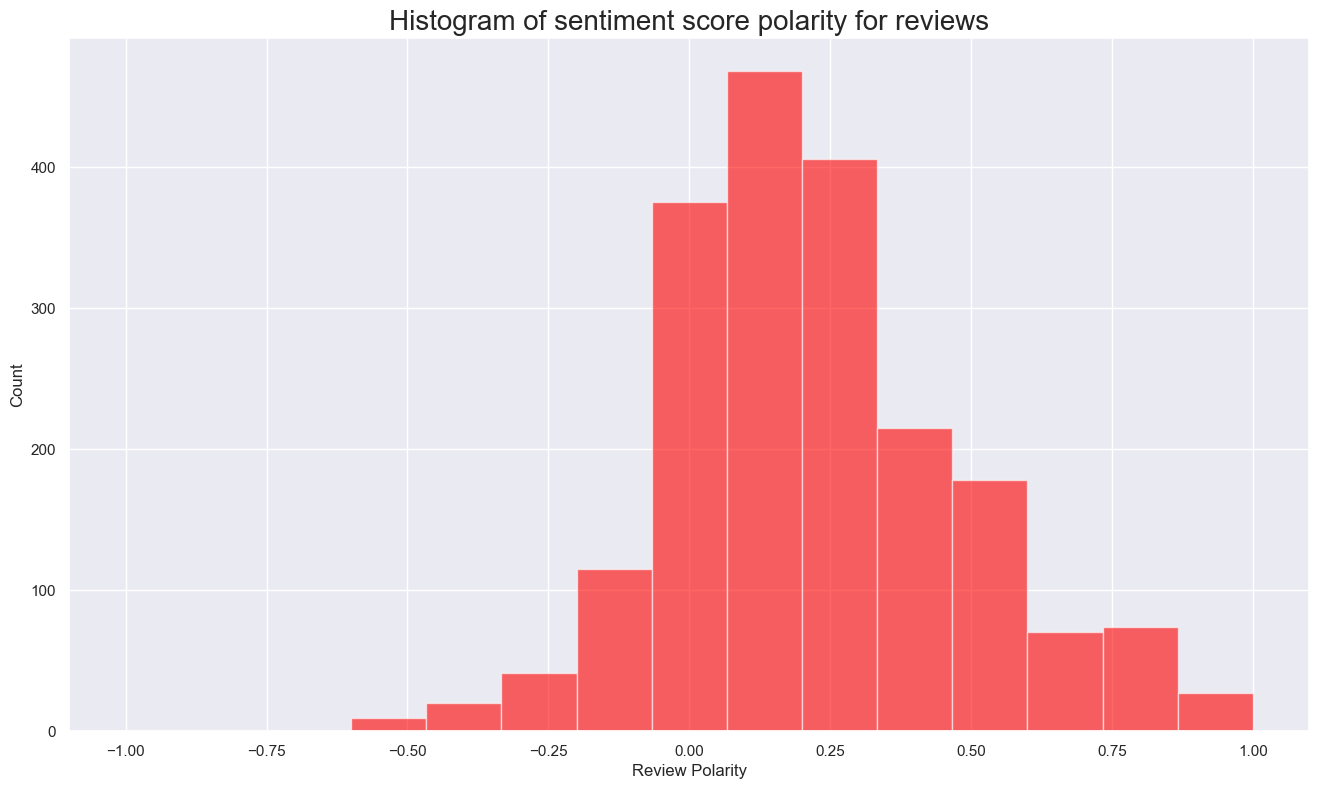

In [189]:
# Review: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_sen['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

plt.show()


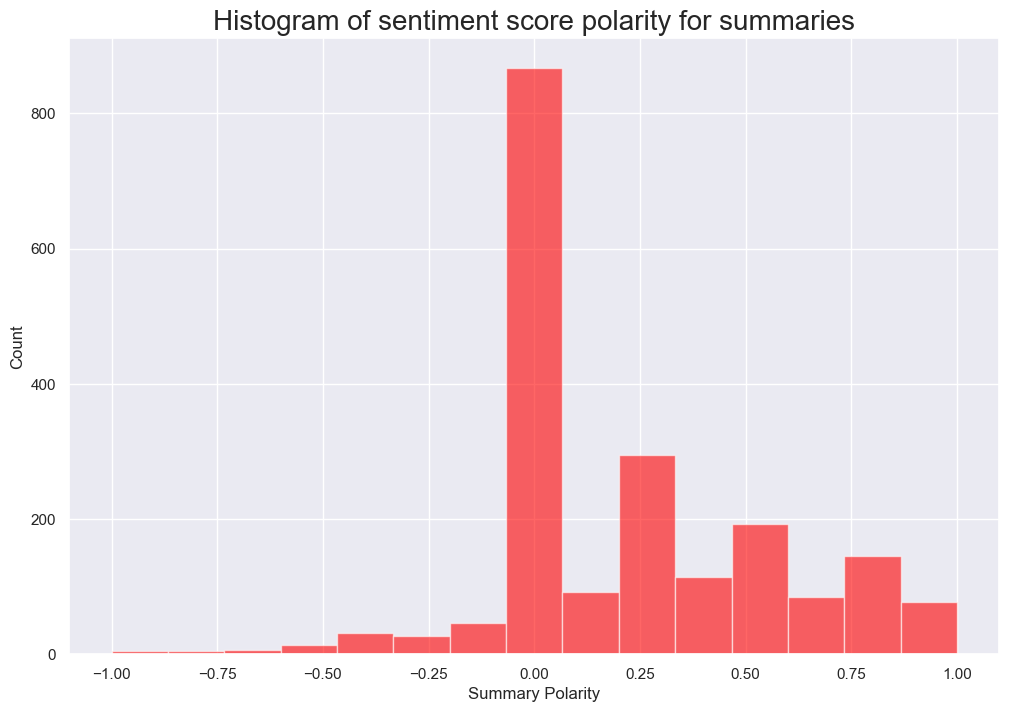

In [166]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Define the bars.
n, bins, patches = plt.hist(df_sen['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summaries', fontsize=20)


# Histogram of sentiment score
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [181]:
# Top 20 negative reviews.
# Create a DataFrame.
review_negative_sentiment = df_sen.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
review_negative_sentiment = review_negative_sentiment.drop(['summary', 'summary_polarity'], axis='columns')

# Adjust the column width.
review_negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(review_negative_sentiment)

                                                 review  review_polarity
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
117   i bought this as a christmas gift for my grand...        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
1524                         expensive for what you get        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two

In [185]:
# Top 20 negative summaries.
# Create a DataFrame.
summary_negative_sentiment = df_sen.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
summary_negative_sentiment = summary_negative_sentiment.drop(['review', 'review_polarity'], axis='columns')

# Adjust the column width.
summary_negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(summary_negative_sentiment)

                                                summary  summary_polarity
21                        the worst value ive ever seen         -1.000000
208    boring unless you are a craft person which i am          -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
144                                        disappointed         -0.750000
631                                        disappointed         -0.750000
793                                        disappointed         -0.750000
1620                                       disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
885            too bad this is not what i was expecting         -0.700000
890                        bad qualityall made of paper         -0.700000
178     at age 31 i found these very d

In [188]:
# Top 20 positive reviews.
# Create a DataFrame.
review_positive_sentiment = df_sen.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
review_positive_sentiment = review_positive_sentiment.drop(['summary', 'summary_polarity'], axis='columns')

# Adjust the column width.
review_positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(review_positive_sentiment)

                                                 review  review_polarity
7                             came in perfect condition              1.0
165                                        awesome book              1.0
194                                        awesome gift              1.0
496   excellent activity for teaching selfmanagement...              1.0
524                         perfect just what i ordered              1.0
591                                   wonderful product              1.0
609                                  delightful product              1.0
621   wonderful for my grandson to learn the resurre...              1.0
790                                             perfect              1.0
933                                             awesome              1.0
1037                                            awesome              1.0
1135                                        awesome set              1.0
1168               best set buy 2 if you have the m

In [187]:
# Top 20 positive summaries.
# Create a DataFrame.
summary_positive_sentiment = df_sen.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
summary_positive_sentiment = summary_positive_sentiment.drop(['review', 'review_polarity'], axis='columns')

# Adjust the column width.
summary_positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(summary_positive_sentiment)

                                               summary  summary_polarity
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
134                            perfect for preschooler               1.0
140             awesome sticker activity for the price               1.0
161                                       awesome book               1.0
163                    he was very happy with his gift               1.0
187                                            awesome               1.0
210           awesome and welldesigned for 9 year olds               1.0
418                                            perfect               1.0
475                                          excellent               1.0
543                                          excell

## 7. Discuss: Insights and observations

***Your observations here...***

Based on the analysis, the observations on the loyaty program are as follow:

The worldcloud and word popularity analysis did not give a lot of formation to the customer’s sentiment. Popular words like "game", "great", and "fun" would be useful keywords in future campaigns to attract new customers. The polarity and sentiment analyses revealed that both the customers’ reviews are positive and the summaries are neutral and positive. The 20 negative and positive reviews and summaries did not reveal too much information because the positive and negatives comments were pretty generic.

# 